# Project: Investigate a Dataset (TMDb Movie Data)

I do want to make note that the goal of this project does not include inferential statistics or any machine learning techniques. This project's goals were to master the Data Analysis process by investigating a dataset from a list of given options.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, we will be analyzing The Movie Database (TMDb) which contains information of over 10,000 films. 

I am interested in taking a look at what makes a film successful. Success can take on a multitude of definitions but for our analysis, we shall define success as a film being both financially and critically well received.

For our analysis of the TMDb Movie Data, we will focus on the film's revenue (and profit) as well as the average voting score.

Below are a list a questions that we shall be focusing on.

### QUESTIONS ###

<a href="#Q1">1.</a> Which <a href="#director#">director</a>, <a href="#genre">genre</a>, <a href="#actor">actor</a> made the most/least profit, profit per film, and best/worst average rating?

<a href="#Q2">2.</a> How has the budget, revenue, and profit trend by average rating?

<a href="#Q3">3.</a> How has the budget trend over revenue?

<a href="#Q4">4.</a> How has the total revenue and average revenue per film trend per month?

<a href="#Q5">5.</a> How has the revenue per genre trend by month?

Let's get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**CHECK FOR FORMAT, NECCESSARY COLUMNS, & MISSING DATA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

+ This database contains 21 columns. We could probably eliminate fields like `imdb_id` since we already have a primary key `id`.
+ We have been informed that `budget_adj` and `revenue_adj` show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation overtime. Therefore, we can also delete the `budget` and `revenue` column as well and rename `budget_adj` and `revenue_adj` as `budget` and `revenue`.
+ Based on our questions above, we can also remove `popularity`, `homepage`,`tagline`,`keywords`,`overview`,`runtime`,`production_companies`,and `release_year`

+ `cast`,`director`,`keywords`,`genres`,`production_companies` each show values seperated by pipe characters.
+ There are 10866 records. We do have missing values for numerous columns such as `cast` and `production_companies`

**CHECK FOR VALUE RANGES**

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


+ It is fairly unlikely that a film's `budget` and `revenue` would be equivalent to \$0. We would have to eliminate these rows otherwise they will skew our analysis.

+ `vote_count` consists of values ranging from 10 to 9767. This is something we might want to keep in mind when analyzing the `vote_average`

In [5]:
df.query('budget<1000 and budget>0').sort_values('budget').head(100)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1151,287524,tt2165765,0.177102,1,0,Fear Clinic,Thomas Dekker|Robert Englund|Cleopatra Coleman...,http://www.fearclinicmovie.com/,Robert Hall,NaN,...,A doctor works to cure patients suffering from...,95,Horror,Dry County Films|Anchor Bay Entertainment|Movi...,10/31/14,15,4.1,2014,0.921091,0.000000e+00
2618,39964,tt0120836,0.090186,1,100,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,NaN,Jeff Pollack,A comedy about a guy who would do anything to ...,...,A comedy about finding your true love at any p...,95,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,4/23/99,14,4.8,1999,1.309053,1.309053e+02
3065,12689,tt0963743,0.472691,1,0,"Angus, Thongs and Perfect Snogging",Georgia Groome|Eleanor Tomlinson|Aaron Taylor-...,http://www.angusthongsmovie.com/intl/uk/,Gurinder Chadha,"Georgia Nicholson is not mental, but her life is.",...,"Georgia Nicolson is fourteen, lives with nosey...",100,Comedy|Drama|Family|Romance,Paramount Pictures|Nickelodeon Movies|Stella-d...,7/25/08,146,6.5,2008,1.012787,0.000000e+00
3581,59296,tt1436559,0.520430,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,http://www.ifcfilms.com/films/love-wedding-mar...,Dermot Mulroney,Here comes the ride.,...,A happy newlywed marriage counselor's views on...,90,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,6/3/11,55,5.3,2011,0.969398,1.335831e+03
8944,14373,tt0082250,0.464188,2,16,Death Wish 2,Charles Bronson|Jill Ireland|Vincent Gardenia|...,NaN,Michael Winner,First His Wife. Now His Daughter. It's Time To...,...,Paul Kersey is again a vigilante trying to fin...,88,Action|Crime|Thriller,Cannon Films,2/20/82,27,5.6,1982,4.519285,3.615428e+01
10050,20701,tt0100740,0.317091,3,16,Tales from the Darkside: The Movie,Rae Dawn Chong|Christian Slater|Deborah Harry|...,NaN,John Harrison,From the depths of four twisted minds.,...,The first segment features an animated mummy s...,93,Fantasy|Horror|Comedy,Paramount Pictures|Laurel Productions|Darkside...,5/3/90,37,5.8,1990,5.006696,2.670238e+01
2398,39356,tt1560139,0.028456,3,43,Boy,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,http://www.boythemovie.co.nz,Taika Waititi,"Summer, Girls, Gangs, Drugs ... its not easy b...",...,"It's 1984, and Michael Jackson is king - even ...",87,Drama|Comedy,New Zealand Film Commission|Unison Films|Whenu...,2/14/10,26,7.3,2010,3.000000,4.300000e+01
3765,91551,tt1384927,0.228643,3,0,Death of a Superhero,Andy Serkis|Thomas Brodie-Sangster|Michael McE...,NaN,Ian Fitzgibbon,When time is precious living can't wait,...,A dying 15-year-old boy draws stories of an in...,97,Animation|Drama,Bavaria Pictures|Grand Pictures|Picture Circle,5/4/11,30,6.5,2011,2.908194,0.000000e+00
1313,286101,tt2664838,0.002922,5,0,Des Lendemains Qui Chantent,Pio MarmaÃ¯|Laetitia Casta|Ramzy Bedia|Gaspard...,NaN,Nicolas Castro,NaN,...,"Olivier and Leo, two brothers that are moved t...",94,Comedy,UGC Distribution,8/20/14,13,6.0,2014,4.605455,0.000000e+00
8235,25066,tt0114609,0.105894,6,11,Tales from the Hood,Clarence Williams III|Corbin Bernsen|David Ala...,NaN,Rusty Cundieff,Chill or be Chilled,...,A strange funeral director tells four strange ...,98,Horror|Thriller,Savoy Pictures,5/24/95,13,5.1,1995,8.585801,1.574064e+01


+ I wanted to take a closer look that the film's budget to if there are more unreasonable values. Based on our data above, we have 59 enteries under `budget` that are entered as being between 0 and 1000. It looks like these entries are missing a few zeros. (There's no way they budgeted $21 for Teenage Mutant Ninja Turtles III!)

**CHECK FOR DUPLICATES**

In [6]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [7]:
df[df['imdb_id']=='tt0411951']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


+ We do have a film that has been accidently entered twice. We would need to eliminate one of these rows.

### Data Cleaning

**Data Cleaning To-Do List**

1. Keep Columns: `id`, `original_title`,`cast`, `director`,`runtime`, `genres`,`release_date`,`vote_count`, `vote_average`,`budget_adj`,`revenue_adj`

2. Rename `budget_adj` as `budget` and `revenue_adj`

3. Delete Duplicate Row: Film w/ `imdb_id` tt0411951 has been entered twice

4. Delete Rows that contain 0 for either `budget_adj` or `revenue_adj`

5. Delete Rows where `budget_adj` is less than 1000

6. Create new column called `profit` (this will be the difference of `revenue_adj` and `budget_adj`)

7. Create tables containing the seperated values in `cast`,`director`,`genres` by pipe character

**1. KEEP COLUMNS**

In [8]:
df_clean=df.copy()
df_clean.drop([ 'imdb_id', 'popularity','budget','revenue','homepage','tagline','keywords',\
               'overview','production_companies','release_year'],axis=1,inplace=True)

**2. RENAME COLUMNS**

In [9]:
df_clean.rename(columns={'budget_adj':'budget','revenue_adj':'revenue'}, inplace=True)

**3. DELETE DUPLICATE ROWS**

In [10]:
df_clean.drop_duplicates(inplace=True)

In [11]:
#check that all duplicates have been removed
df_clean[df_clean.duplicated()]

,id,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,budget,revenue


**4. DELETE ROWS CONTAINING 0 FOR EITHER `budget` or `revenue`**

In [12]:
df_clean.drop(df_clean.query('budget==0 | revenue==0').index,inplace=True)

In [13]:
#check that only rows with nonzero values for budget and revenue have been kept
df_clean.describe()

,id,runtime,vote_count,vote_average,budget,revenue
count,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,109.220291,527.720291,6.168163,4.423999e+07,1.370647e+08
std,67222.527399,19.922820,879.956821,0.794920,4.480925e+07,2.161114e+08
min,5.000000,15.000000,10.000000,2.200000,9.693980e-01,2.370705e+00
25%,6073.500000,95.000000,71.000000,5.700000,1.309053e+07,1.835735e+07
50%,11321.500000,106.000000,204.000000,6.200000,3.001611e+07,6.173068e+07
75%,38573.250000,119.000000,580.000000,6.700000,6.061307e+07,1.632577e+08
max,417859.000000,338.000000,9767.000000,8.400000,4.250000e+08,2.827124e+09


**5. Delete Rows where `budget` is less than 1000**

In [14]:
df_clean.drop(df_clean.query('budget<1000').index,inplace=True)

In [15]:
#check that all duplicates have been removed
df_clean[df_clean.budget<1000]

,id,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,budget,revenue


**6. Create new column called `profit` (this will be the difference of `revenue` and `budget`)**

In [16]:
df_clean['profit']=df_clean['revenue']-df_clean['budget']

**7. Create tables containing the seperated values in `cast`,`director`,`genres` by pipe character**

> **df_cast** will be our Data Frame holding the film's id and their associated cast members

In [17]:
df_cast=pd.DataFrame(columns=['id','cast'])
for film,cast in df_clean[['id','cast']].dropna().values:
    for actor in cast.split('|'):
        df_cast=df_cast.append({'id':film,'cast':actor},ignore_index=True)
df_cast.head()

,id,cast
0,135397,Chris Pratt
1,135397,Bryce Dallas Howard
2,135397,Irrfan Khan
3,135397,Vincent D'Onofrio
4,135397,Nick Robinson


In [18]:
#check that new Data Frame does not contain the pipe character
df_cast.cast.str.contains('\|').any()

False

> Since we no longer need the `cast` column in `df_clean`, we can go ahead and drop that column

In [19]:
df_clean.drop('cast',axis=1, inplace=True)

> **df_director** will be our Data Frame holding the film's id and their associated director(s)

In [20]:
df_director=pd.DataFrame(columns=['id','director'])
for film,directors in df_clean[['id','director']].dropna().values:
    for director in directors.split('|'):
        df_director=df_director.append({'id':film,'director':director},ignore_index=True)
df_director.head()

,id,director
0,135397,Colin Trevorrow
1,76341,George Miller
2,262500,Robert Schwentke
3,140607,J.J. Abrams
4,168259,James Wan


In [21]:
#check that new Data Frame does not contain the pipe character
df_director.director.str.contains('\|').any()

False

> Since we no longer need the `director` column in `df_clean`, we can go ahead and drop that column

In [22]:
df_clean.drop('director',axis=1, inplace=True)

> **df_genres** will be our Data Frame holding the film's id and their associated genre

In [23]:
df_genres=pd.DataFrame(columns=['id','genres'])
for film,genres in df_clean[['id','genres']].dropna().values:
    for genre in genres.split('|'):
        df_genres=df_genres.append({'id':film,'genres':genre},ignore_index=True)
df_genres.head()

,id,genres
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action


In [24]:
#check that new Data Frame does not contain the pipe character
df_genres.genres.str.contains('\|').any()

False

> Since we no longer need the `genres` column in `df_clean`, we can go ahead and drop that column

In [25]:
df_clean.drop('genres',axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

<a id="Q1"></a>
### Research Question 1###
+ **Which <a href="#director">director</a>, <a href="#genre">genre</a>, <a href="#actor">actor</a> made the most/least profit, profit per film, and best/worst average rating?**

**<a id="director">DIRECTOR</a>**

In [26]:
df_director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 2 columns):
id          4142 non-null object
director    4142 non-null object
dtypes: object(2)
memory usage: 64.8+ KB


In [27]:
#Since the data type for 'id' under df_director is not the same as under df_clean,
#we must convert 'id' under director to interger form in order for the merge to work

df_director.id=df_director.id.astype(int)

In [28]:
df_temp=df_director.merge(df_clean[['id','profit','vote_average']], on='id',how='left')
df_temp.head()

,id,director,profit,vote_average
0,135397,Colin Trevorrow,1.254446e+09,6.5
1,76341,George Miller,2.101614e+08,7.1
2,262500,Robert Schwentke,1.704191e+08,6.3
3,140607,J.J. Abrams,1.718723e+09,7.5
4,168259,James Wan,1.210949e+09,7.3


In [29]:
df_temp.groupby('director').profit.sum().sort_values(ascending=False).head(5)

director
Steven Spielberg    1.316861e+10
James Cameron       6.296578e+09
George Lucas        5.844159e+09
Peter Jackson       5.645492e+09
Robert Zemeckis     4.335995e+09
Name: profit, dtype: float64

>**Most Profit**: Our five most profitable directors are Steven Spielberg, James Cameron,George Lucas,Peter Jackson, and Robert Zemeckis.

In [30]:
df_temp.groupby('director').profit.sum().sort_values().head(5)

director
Sngmoo Lee      -4.139124e+08
Aaron Blaise    -1.185350e+08
Robert Walker   -1.185350e+08
Rod Lurie       -8.030989e+07
John Bruno      -7.983823e+07
Name: profit, dtype: float64

>**Least Profit**: Our five least profitable directors are Sngmoo Lee, Aaron Blaise,Robert Walker,Rod Lurie, and John Bruno.

In [31]:
df_temp.groupby('director').profit.mean().sort_values(ascending=False).head(5)

director
Irwin Winkler       1.551568e+09
Hamilton Luske      1.545635e+09
Clyde Geronimi      1.545635e+09
Richard Marquand    1.182995e+09
Jennifer Lee        1.052306e+09
Name: profit, dtype: float64

>**Most Profit Per Film**: Our five most profitable per film directors are Irwin Winkler, Hamilton Luske,Clyde Geronimi,Richard Marquand, and Jennifer Lee.

In [32]:
df_temp.groupby('director').profit.mean().sort_values().head(5)

director
Sngmoo Lee      -4.139124e+08
Aaron Blaise    -1.185350e+08
Robert Walker   -1.185350e+08
John Bruno      -7.983823e+07
Hugh Johnson    -7.688857e+07
Name: profit, dtype: float64

>**Least Profit Per Film**: Our five least profitable directors are Sngmoo Lee, Aaron Blaise,Robert Walker,John Bruno, and Hugh Johnson.

In [33]:
df_temp.groupby('director').vote_average.mean().sort_values(ascending=False).head(5)

director
Damien Chazelle     8.2
Morten Tyldum       8.0
Tony Kaye           8.0
Xavier Dolan        8.0
Lenny Abrahamson    8.0
Name: vote_average, dtype: float64

>**Best Voting Score Average**: Our five directors w/ best average voting score are Damien Chazelle, Morten Tyldum,Tony Kaye ,Xavier Dolan,Lenny Abrahamson.

In [34]:
df_temp.groupby('director').vote_average.mean().sort_values().head(5)

director
Lawrence Kasanoff    2.200000
Charles McCracken    3.500000
Uwe Boll             3.566667
Luca Bercovici       3.600000
Dick Maas            3.700000
Name: vote_average, dtype: float64

>**Worst Voting Score Average**: Our five directors w/ the worst average voting score are Lawrence Kasanoff, Charles McCracken,Uwe Boll ,Luca Bercovici ,John Bruno.

**<a id="genre">GENRE</a>**

In [35]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10246 entries, 0 to 10245
Data columns (total 2 columns):
id        10246 non-null object
genres    10246 non-null object
dtypes: object(2)
memory usage: 160.2+ KB


In [36]:
#Since the data type for 'id' under df_genres is not the same as under df_clean,
#we must convert 'id' under genres to interger form in order for the merge to work

df_genres.id=df_genres.id.astype(int)

In [37]:
df_temp=pd.DataFrame()
df_temp=df_genres.merge(df_clean[['id','profit','vote_average']], on='id',how='left')
df_temp.head()

,id,genres,profit,vote_average
0,135397,Action,1.254446e+09,6.5
1,135397,Adventure,1.254446e+09,6.5
2,135397,Science Fiction,1.254446e+09,6.5
3,135397,Thriller,1.254446e+09,6.5
4,76341,Action,2.101614e+08,7.1


In [38]:
df_temp.groupby('genres').profit.sum().sort_values(ascending=False).head(5)

genres
Adventure    1.421947e+11
Action       1.396767e+11
Drama        1.168205e+11
Comedy       1.115193e+11
Thriller     1.006036e+11
Name: profit, dtype: float64

>**Most Profit**: Our five most profitable genres are Adventure, Action,Drama,Comedy, and Thriller.

In [39]:
df_temp.groupby('genres').profit.sum().sort_values().head(5)

genres
Foreign       -2.138031e+06
TV Movie       5.143802e+07
Documentary    6.799262e+08
Western        3.561153e+09
History        8.356862e+09
Name: profit, dtype: float64

>**Least Profit**: Our five least profitable genres are Foreign, TV Movie,Documentary,Western, and History.

In [40]:
df_temp.groupby('genres').profit.mean().sort_values(ascending=False).head(5)

genres
Animation          2.085227e+08
Adventure          1.906095e+08
Family             1.729652e+08
Fantasy            1.710511e+08
Science Fiction    1.367995e+08
Name: profit, dtype: float64

>**Most Profit Per Film**: Our five most profitable per film genres are Animation, Adventure,Family ,Fantasy, and Science Fiction.

In [41]:
df_temp.groupby('genres').profit.mean().sort_values().head(5)

genres
Foreign       -1.644639e+05
Documentary    1.942646e+07
TV Movie       5.143802e+07
Horror         5.854519e+07
History        6.478188e+07
Name: profit, dtype: float64

>**Least Profit Per Film**: Our five least profitable genres are Foreign, Documentary,TV Movie ,Horror, and History.

In [42]:
df_temp.groupby('genres').vote_average.mean().sort_values(ascending=False).head(5)

genres
Documentary    6.660000
War            6.586555
History        6.578295
Western        6.467308
Drama          6.397539
Name: vote_average, dtype: float64

>**Best Voting Score Average**: Our five genres w/ best average voting score are Documentary, War,History ,Western,and Drama.

In [43]:
df_temp.groupby('genres').vote_average.mean().sort_values().head(5)

genres
TV Movie           5.600000
Horror             5.712391
Science Fiction    6.027799
Comedy             6.028656
Action             6.038312
Name: vote_average, dtype: float64

>**Worst Voting Score Average**: Our five genres w/ the worst average voting score are TV Movie, Horror,Science Fiction,Comedy, and Action.

**<a id="actor">ACTOR</a>**

In [44]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19086 entries, 0 to 19085
Data columns (total 2 columns):
id      19086 non-null object
cast    19086 non-null object
dtypes: object(2)
memory usage: 298.3+ KB


In [45]:
#Since the data type for 'id' under df_cast is not the same as under df_clean,
#we must convert 'id' under cast to interger form in order for the merge to work

df_cast.id=df_cast.id.astype(int)

In [46]:
df_temp=pd.DataFrame()
df_temp=df_cast.merge(df_clean[['id','profit','vote_average']], on='id',how='left')
df_temp.head()

,id,cast,profit,vote_average
0,135397,Chris Pratt,1.254446e+09,6.5
1,135397,Bryce Dallas Howard,1.254446e+09,6.5
2,135397,Irrfan Khan,1.254446e+09,6.5
3,135397,Vincent D'Onofrio,1.254446e+09,6.5
4,135397,Nick Robinson,1.254446e+09,6.5


In [47]:
df_temp.groupby('cast').profit.sum().sort_values(ascending=False).head(5)

cast
Harrison Ford    1.180842e+10
Tom Cruise       8.361769e+09
Tom Hanks        8.079465e+09
Carrie Fisher    7.263715e+09
Emma Watson      7.212040e+09
Name: profit, dtype: float64

>**Most Profit**: Our five most profitable actors are Harrison Ford, Tom Cruise,Tom Hanks,Carrie Fisher, and Emma Watson.

In [48]:
df_temp.groupby('cast').profit.sum().sort_values().head(5)

cast
Jang Dong-gun        -4.139124e+08
Ti Lung              -4.139124e+08
Kate Bosworth        -2.191591e+08
Emilio EchevarrÃ­a   -1.375868e+08
David Hyde Pierce    -1.351032e+08
Name: profit, dtype: float64

>**Least Profit**: Our five least profitable actors are Jang Dong-gun, Ti Lung,Kate Bosworth,Emilio EchevarrÃ­a, and David Hyde Pierce.

In [49]:
df_temp.groupby('cast').profit.mean().sort_values(ascending=False).head(5)

cast
Jason Miller          2.128036e+09
Robert MacNaughton    1.767968e+09
Daisy Ridley          1.718723e+09
Wendy Gazelle         1.551568e+09
Ken Howard            1.551568e+09
Name: profit, dtype: float64

>**Most Profit Per Film**: Our five most profitable per film actors are Jason Miller, Robert MacNaughton,Daisy Ridley ,Wendy Gazelle, and Ken Howard.

In [50]:
df_temp.groupby('cast').profit.mean().sort_values().head(5)

cast
Ti Lung              -4.139124e+08
Jang Dong-gun        -4.139124e+08
Emilio EchevarrÃ­a   -1.375868e+08
Clive Russell        -1.286813e+08
Vladimir Kulich      -1.286813e+08
Name: profit, dtype: float64

>**Least Profit Per Film**: Our five least profitable per film actors are Ti Lung, Jang Dong-gun,Emilio EchevarrÃ­a ,Clive Russell, and Vladimir Kulich.

In [51]:
df_temp.groupby('cast').vote_average.mean().sort_values(ascending=False).head(5)

cast
Chris Frantz      8.4
David Byrne       8.4
Steven Scales     8.4
Jerry Harrison    8.4
Tina Weymouth     8.4
Name: vote_average, dtype: float64

>**Best Voting Score Average**: Our five actors w/ best average voting score are Chris Frantz, David Byrne,Steven Scales ,Jerry Harrison,and Tina Weymouth.

In [52]:
df_temp.groupby('cast').vote_average.mean().sort_values().head(5)

cast
Wayne Brady                2.2
Gary 'G. Thang' Johnson    3.3
Vanessa Lachey             3.3
Amelia Curtis              3.3
Crista Flanagan            3.3
Name: vote_average, dtype: float64

>**Worst Voting Score Average**: Our five actors w/ the worst average voting score are Wayne Brady, Gary 'G. Thang' Johnson,Vanessa Lachey ,Amelia Curtis,and Crista Flanagan.

<a id="Q2"></a>
### Research Question 2 
+ **How has the budget, revenue, and profit trend by average rating?**


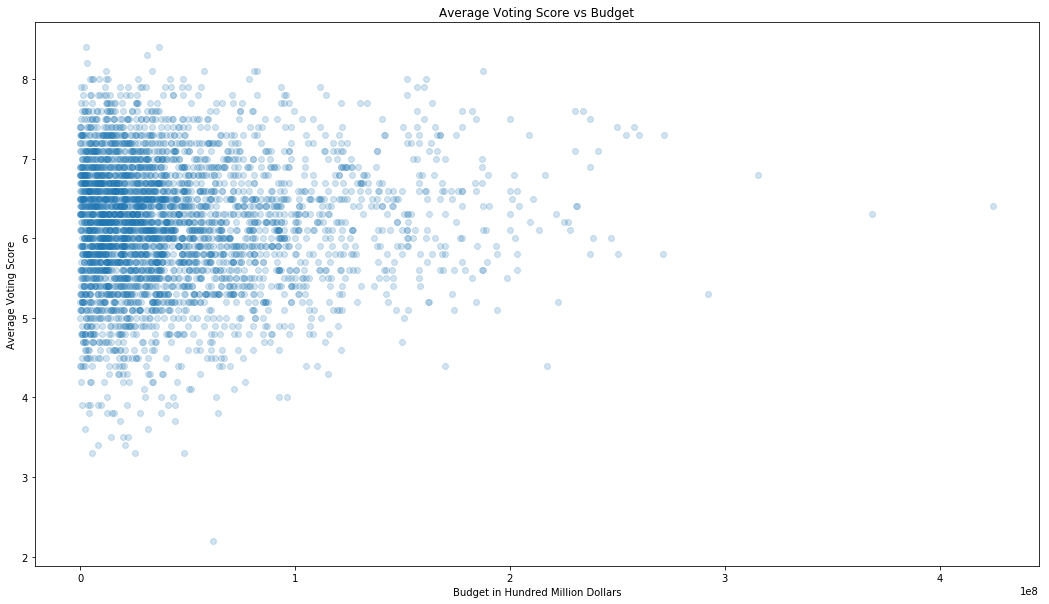

In [53]:
plt.figure(figsize=(18,10))
plt.scatter(x=df_clean.budget, y=df_clean.vote_average, alpha=.2)
plt.xlabel('Budget in Hundred Million Dollars')
plt.ylabel('Average Voting Score')
plt.title('Average Voting Score vs Budget');

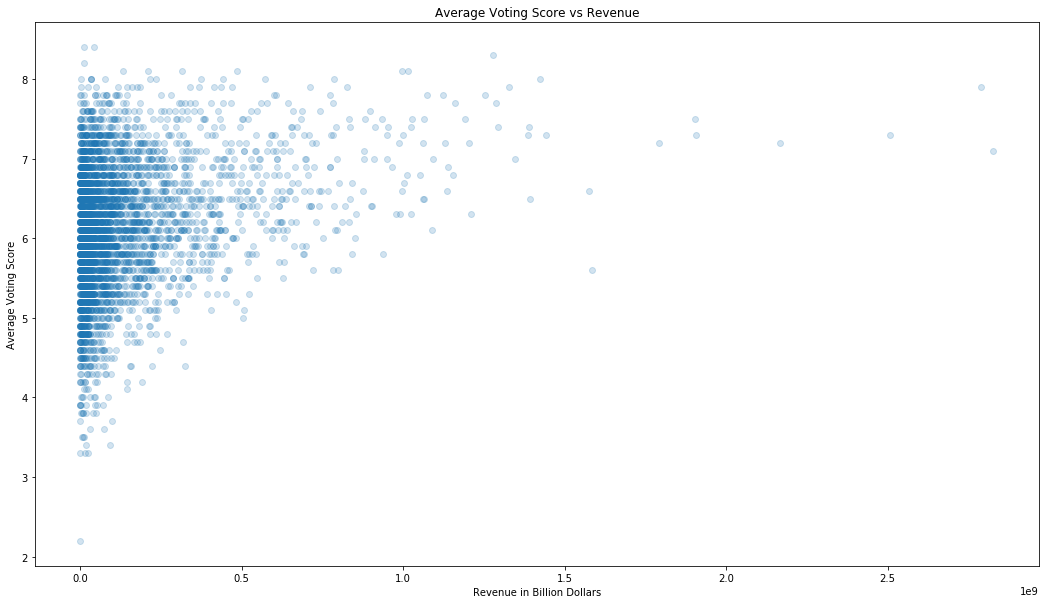

In [54]:
plt.figure(figsize=(18,10))
plt.scatter(x=df_clean.revenue, y=df_clean.vote_average, alpha=.2)
plt.xlabel('Revenue in Billion Dollars')
plt.ylabel('Average Voting Score')
plt.title('Average Voting Score vs Revenue');

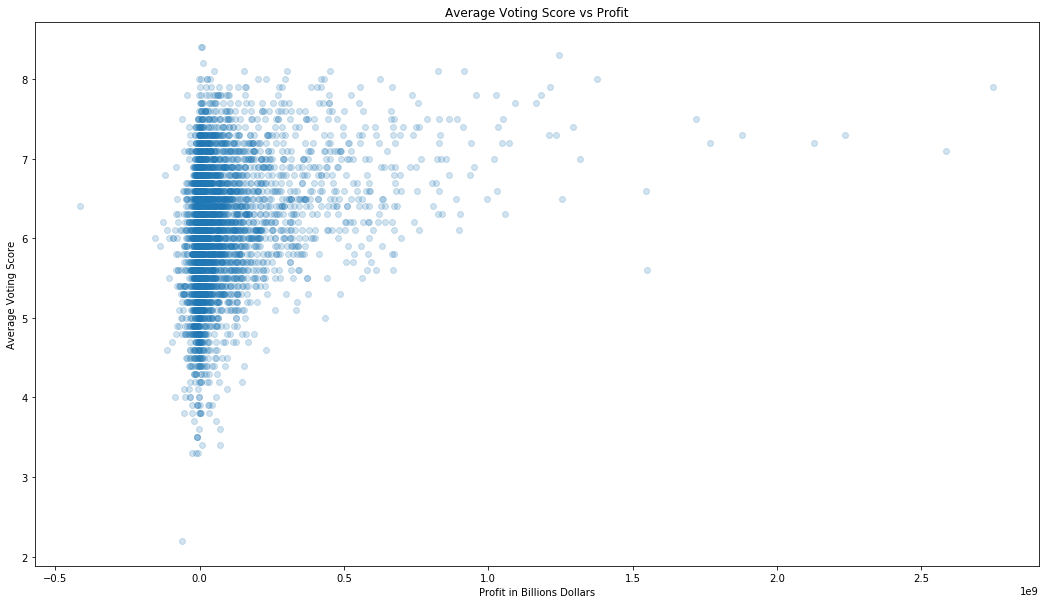

In [55]:
plt.figure(figsize=(18,10))
plt.scatter(x=df_clean.profit, y=df_clean.vote_average, alpha=.2)
plt.xlabel('Profit in Billions Dollars')
plt.ylabel('Average Voting Score')
plt.title('Average Voting Score vs Profit');

In [56]:
df_clean[['budget','revenue','profit','vote_average']].corr()

,budget,revenue,profit,vote_average
budget,1.000000,0.569376,0.403362,0.035210
revenue,0.569376,1.000000,0.981899,0.266825
profit,0.403362,0.981899,1.000000,0.288886
vote_average,0.035210,0.266825,0.288886,1.000000


<a id="Q3"></a>
### Research Question 3
+ **How has the budget trend over revenue?**

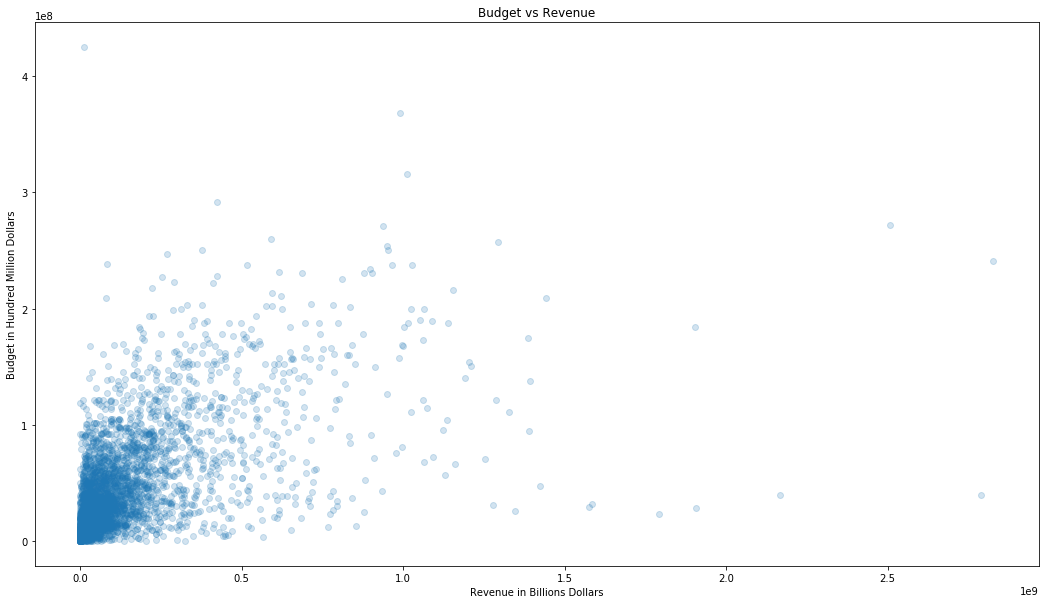

In [57]:
plt.figure(figsize=(18,10))
plt.scatter(x=df_clean.revenue, y=df_clean.budget, alpha=.2)
plt.xlabel('Revenue in Billions Dollars')
plt.ylabel('Budget in Hundred Million Dollars')
plt.title('Budget vs Revenue');

In [58]:
df_clean[['revenue','budget']].corr()

,revenue,budget
revenue,1.000000,0.569376
budget,0.569376,1.000000


<a id="Q4"></a>
### Research Question 4 
+ **How has the total revenue and average revenue per film trend per month?**

In [59]:
#let's go ahead and create a new column for the month of the release date

df_clean['release_month']=df_clean['release_date'].apply(lambda x: x.split('/')[0])

In [60]:
df_clean.head()


,id,original_title,runtime,release_date,vote_count,vote_average,budget,revenue,profit,release_month
0,135397,Jurassic World,124,6/9/15,5562,6.5,1.379999e+08,1.392446e+09,1.254446e+09,6
1,76341,Mad Max: Fury Road,120,5/13/15,6185,7.1,1.379999e+08,3.481613e+08,2.101614e+08,5
2,262500,Insurgent,119,3/18/15,2480,6.3,1.012000e+08,2.716190e+08,1.704191e+08,3
3,140607,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,1.839999e+08,1.902723e+09,1.718723e+09,12
4,168259,Furious 7,137,4/1/15,2947,7.3,1.747999e+08,1.385749e+09,1.210949e+09,4


In [61]:
df_temp=pd.Series()
df_temp=df_clean.groupby('release_month').revenue.sum().sort_values()
df_temp

release_month
1     1.607621e+10
2     2.140175e+10
9     2.912213e+10
4     2.964242e+10
8     3.005392e+10
10    3.675235e+10
3     3.698163e+10
7     5.521232e+10
11    5.613992e+10
5     5.957570e+10
6     7.812115e+10
12    7.892283e+10
Name: revenue, dtype: float64

In [62]:
#In order for the index to be ordered by month, we must convert the index to interger form
df_temp.index=df_temp.index.astype(int)

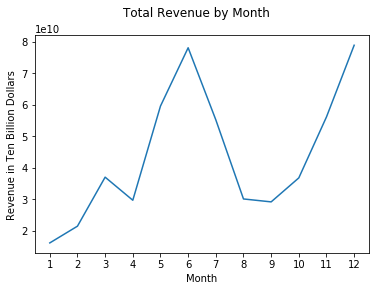

In [63]:
plt.plot(df_temp[df_temp.index.sort_values()])
plt.xticks(list(range(1,13)))
plt.suptitle('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue in Ten Billion Dollars');

In [64]:
df_temp=pd.Series()
df_temp=df_clean.groupby('release_month').revenue.mean().sort_values()
df_temp

release_month
9     6.358543e+07
1     7.209063e+07
2     8.459189e+07
8     8.971320e+07
10    1.012462e+08
4     1.122819e+08
3     1.335077e+08
7     1.747225e+08
11    1.846708e+08
12    1.906349e+08
5     2.068601e+08
6     2.318135e+08
Name: revenue, dtype: float64

In [65]:
#In order for the index to be ordered by month, we must convert the index to interger form
df_temp.index=df_temp.index.astype(int)

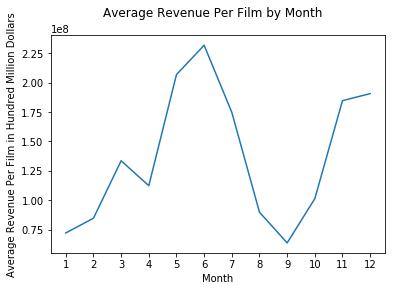

In [66]:
plt.plot(df_temp[df_temp.index.sort_values()])
plt.xticks(list(range(1,13)))
plt.suptitle('Average Revenue Per Film by Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue Per Film in Hundred Million Dollars');

<a id="Q5"></a>
### Research Question 5
+ **How has the revenue per genre trend by month?**

In [67]:
df_temp=pd.DataFrame()
df_temp=df_genres.merge(df_clean[['id','revenue','release_month']],on='id',how='left')
df_temp.head()

,id,genres,revenue,release_month
0,135397,Action,1.392446e+09,6
1,135397,Adventure,1.392446e+09,6
2,135397,Science Fiction,1.392446e+09,6
3,135397,Thriller,1.392446e+09,6
4,76341,Action,3.481613e+08,5


In [68]:
#We need to convert the release_month into intergers in order to have months in order
df_temp.release_month=df_temp.release_month.astype(int)

In [69]:
temp_sum=df_temp.groupby(['genres','release_month']).revenue.sum()

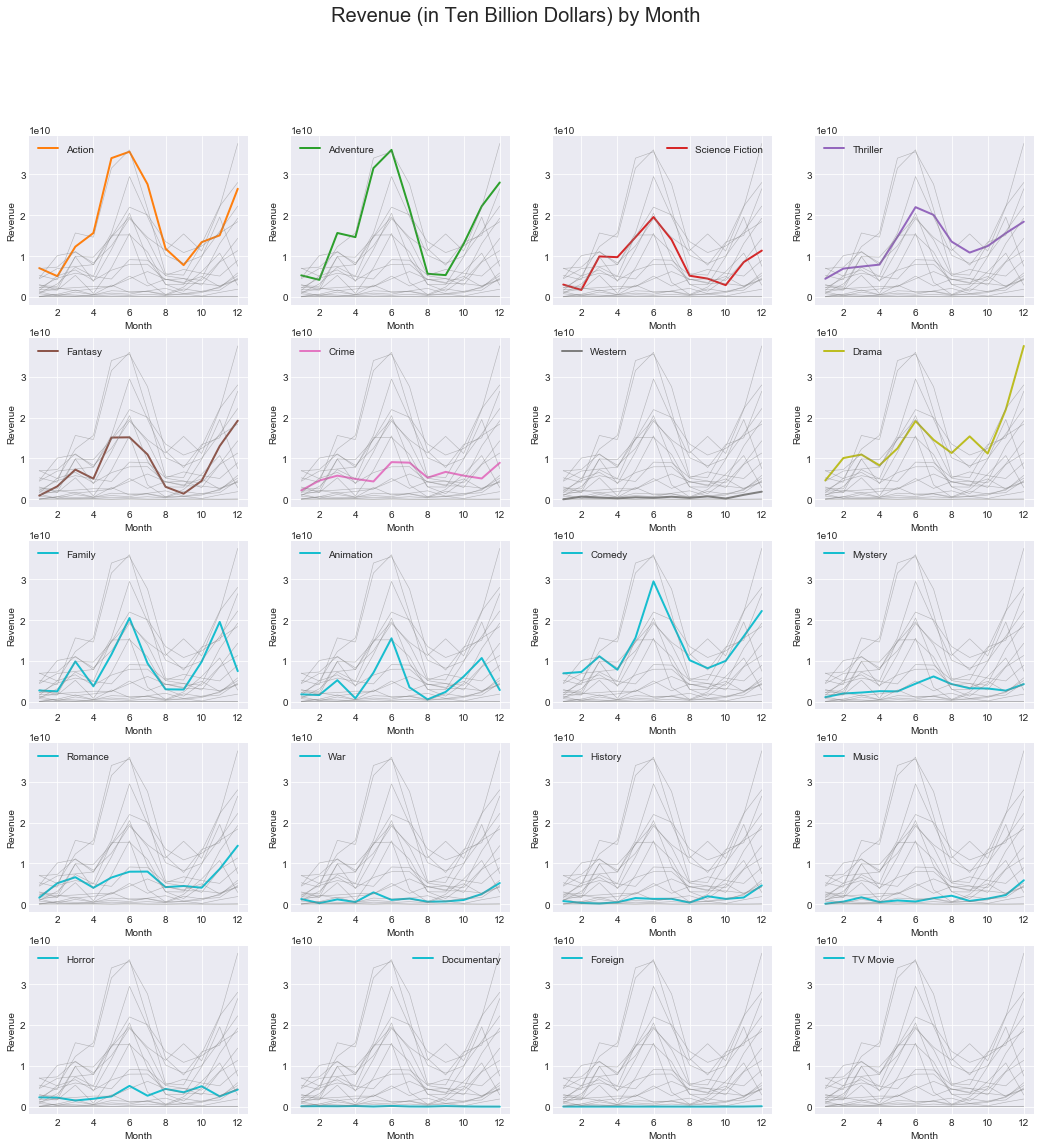

In [70]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(18,18))
plt.xlim(1,12)
num=0
palatte=plt.get_cmap('tab10')

for genre in df_genres.genres.unique():
    num+=1
    plt.suptitle('Revenue (in Ten Billion Dollars) by Month',fontsize=20,weight=2)
    plt.subplot(5,4,num)
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.plot(temp_sum.loc[genre],color=palatte(num),linewidth=2,label=genre)
    plt.legend()
    #Below is the code to compare each genre with the rest of the genre's revenue (in grey)
    for _ in df_genres.genres.unique()[df_genres.genres.unique()!=genre]:
        plt.plot(temp_sum.loc[_],color='grey',alpha=.5,linewidth=.6)
    

<a id='conclusions'></a>
## Conclusions

I do want to remind once again that this project does not involve any inferential statistics or machine learning techniques.
Our findings here are tentative and will be revisited again in the future as I continue to learning more advance data analysis techniques.

Our findings were based on a list of questions that we established earlier.

**QUESTIONS**

<a href="#Q1">1.</a> Which <a href="#director#">director</a>, <a href="#genre">genre</a>, <a href="#actor">actor</a> made the most/least profit, profit per film, and best/worst average rating?

<a href="#Q2">2.</a> How has the budget, revenue, and profit trend by average rating?

<a href="#Q3">3.</a> How has the budget trend over revenue?

<a href="#Q4">4.</a> How has the total revenue and average revenue per film trend per month?

<a href="#Q5">5.</a> How has the revenue per genre trend by month?

-----------------------------------------------------------------------------------

**Q1.** Which <a href="#director#">director</a>, <a href="#genre">genre</a>, <a href="#actor">actor</a> made the most/least profit, profit per film, and best/worst average rating?

**A. Directors**

Our five most profitable directors are Steven Spielberg, James Cameron,George Lucas,Peter Jackson, and Robert Zemeckis.
Our five least profitable directors are Sngmoo Lee, Aaron Blaise,Robert Walker,Rod Lurie, and John Bruno.

Our five most profitable per film directors are Irwin Winkler, Hamilton Luske,Clyde Geronimi,Richard Marquand, and Jennifer Lee.
Our five least profitable directors are Sngmoo Lee, Aaron Blaise,Robert Walker,John Bruno, and Hugh Johnson.

Our five directors w/ best average voting score are Damien Chazelle, Morten Tyldum,Tony Kaye ,Xavier Dolan,Lenny Abrahamson.
Our five directors w/ the worst average voting score are Lawrence Kasanoff, Charles McCracken,Uwe Boll ,Luca Bercovici ,John Bruno.

**B. Genres**

Our five most profitable genres are Adventure, Action,Drama,Comedy, and Thriller.
Our five least profitable genres are Foreign, TV Movie, Documentary, Western, and History.
Our five most profitable per film genres are Animation, Adventure,Family ,Fantasy, and Science Fiction.
Our five least profitable genres are Foreign, Documentary,TV Movie ,Horror, and History.
Our five genres w/ best average voting score are Documentary, War, History , Western ,and Drama.
Our five genres w/ the worst average voting score are TV Movie, Horror,Science Fiction,Comedy, and Action.

**C. Actors**

Our five most profitable actors are Harrison Ford, Tom Cruise,Tom Hanks,Carrie Fisher, and Emma Watson.
Our five least profitable actors are Jang Dong-gun, Ti Lung,Kate Bosworth,Emilio EchevarrÃ­a, and David Hyde Pierce.

Our five most profitable per film actors are Jason Miller, Robert MacNaughton,Daisy Ridley ,Wendy Gazelle, and Ken Howard.
Our five least profitable per film actors are Ti Lung, Jang Dong-gun,Emilio EchevarrÃ­a ,Clive Russell, and Vladimir Kulich.

Our five actors w/ best average voting score are Chris Frantz, David Byrne,Steven Scales ,Jerry Harrison,and Tina Weymouth.
Our five actors w/ the worst average voting score are Wayne Brady, Gary 'G. Thang' Johnson,Vanessa Lachey ,Amelia Curtis,and Crista Flanagan.

-----------------------------------------------------------------------------------

**Q2.** How has the budget, revenue, and profit trend by average rating?

Based on our data, the correlation between our average voting score and our variables (budget, revenue, and profit)
shows to have a positive and very weak relationship.

-----------------------------------------------------------------------------------

**Q3.** How has the budget trend over revenue?

The correlation between the budget and revenue shows to have a positive weak relationship.

-----------------------------------------------------------------------------------

**Q4.** How has the total revenue and average revenue per film trend per month?

The total revenue for films seems to be at its lowest for films released in January. Contrary, the most total revenue generated are films released during the months of June through July and December.

Observing the average revenue per film seems to be at its lowest during months of January and September. Contrary, it is at its most for films released during the months of May through July.

-----------------------------------------------------------------------------------

**Q5** How has the revenue per genre trend by month?

The most noticeably trend in our data shows that most genres (but not all) produce the most total revenue for films released during the months of June and December. For example, Actions, Adventure, Science Fiction and Comedy all show a spike in total revenue for films released in June.
Similary, films released in December showed a spike in total revenue for genres of Action, Advenure, Drama, and Fantasy. Unexpectedly, I did notice a dip for films released in December of the genre Family and Animation.